# importing libraries needed for this project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns',None)

In [2]:
from scipy import stats

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# data exploration

## reading the dataset

In [4]:
parkDF = pd.read_csv("parkinsons.csv")

In [5]:
parkDF

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


## analyizing the dataset

In [6]:
parkDF.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [7]:
#checking for n/a values


In [8]:
parkDF.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [9]:
parkDF.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [10]:
parkDF.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

array([[<Axes: title={'center': 'MDVP:Fo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Fhi(Hz)'}>,
        <Axes: title={'center': 'MDVP:Flo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Jitter(%)'}>,
        <Axes: title={'center': 'MDVP:Jitter(Abs)'}>],
       [<Axes: title={'center': 'MDVP:RAP'}>,
        <Axes: title={'center': 'MDVP:PPQ'}>,
        <Axes: title={'center': 'Jitter:DDP'}>,
        <Axes: title={'center': 'MDVP:Shimmer'}>,
        <Axes: title={'center': 'MDVP:Shimmer(dB)'}>],
       [<Axes: title={'center': 'Shimmer:APQ3'}>,
        <Axes: title={'center': 'Shimmer:APQ5'}>,
        <Axes: title={'center': 'MDVP:APQ'}>,
        <Axes: title={'center': 'Shimmer:DDA'}>,
        <Axes: title={'center': 'NHR'}>],
       [<Axes: title={'center': 'HNR'}>,
        <Axes: title={'center': 'status'}>,
        <Axes: title={'center': 'RPDE'}>,
        <Axes: title={'center': 'DFA'}>,
        <Axes: title={'center': 'spread1'}>],
       [<Axes: title={'center': 'spread2'}>,
   

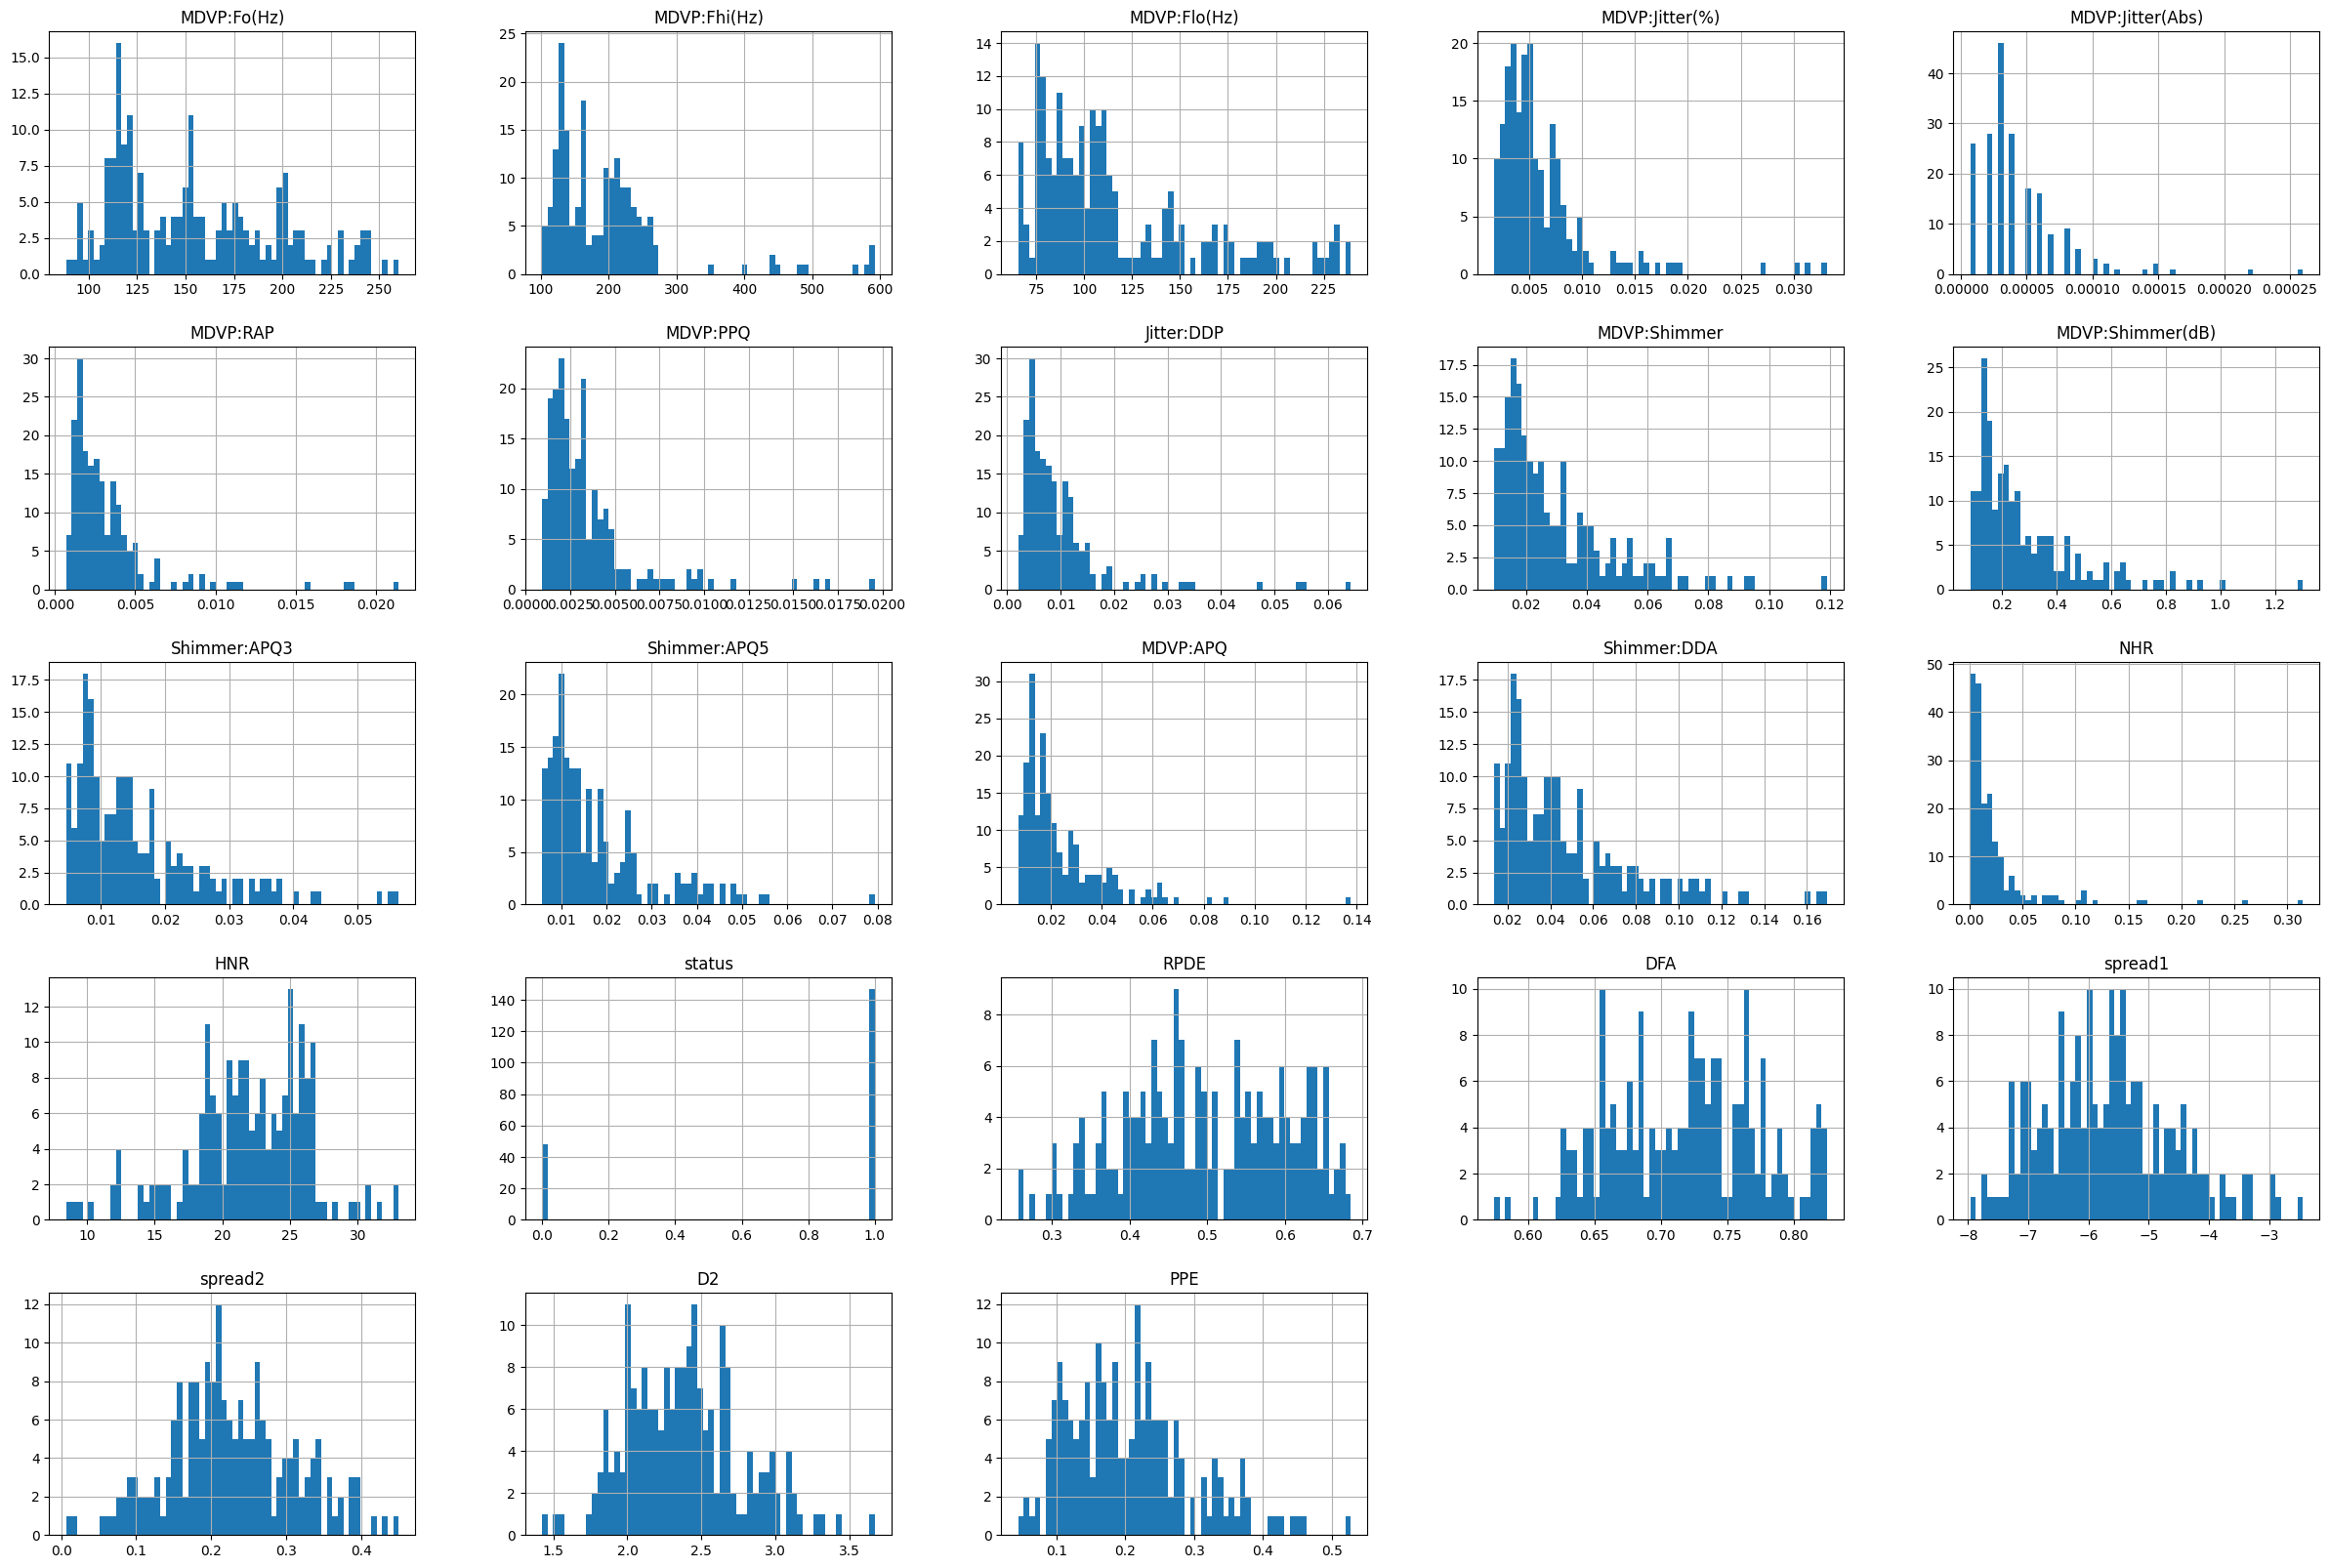

In [11]:
parkDF.hist(figsize=(30,20),bins = 60)

<Axes: >

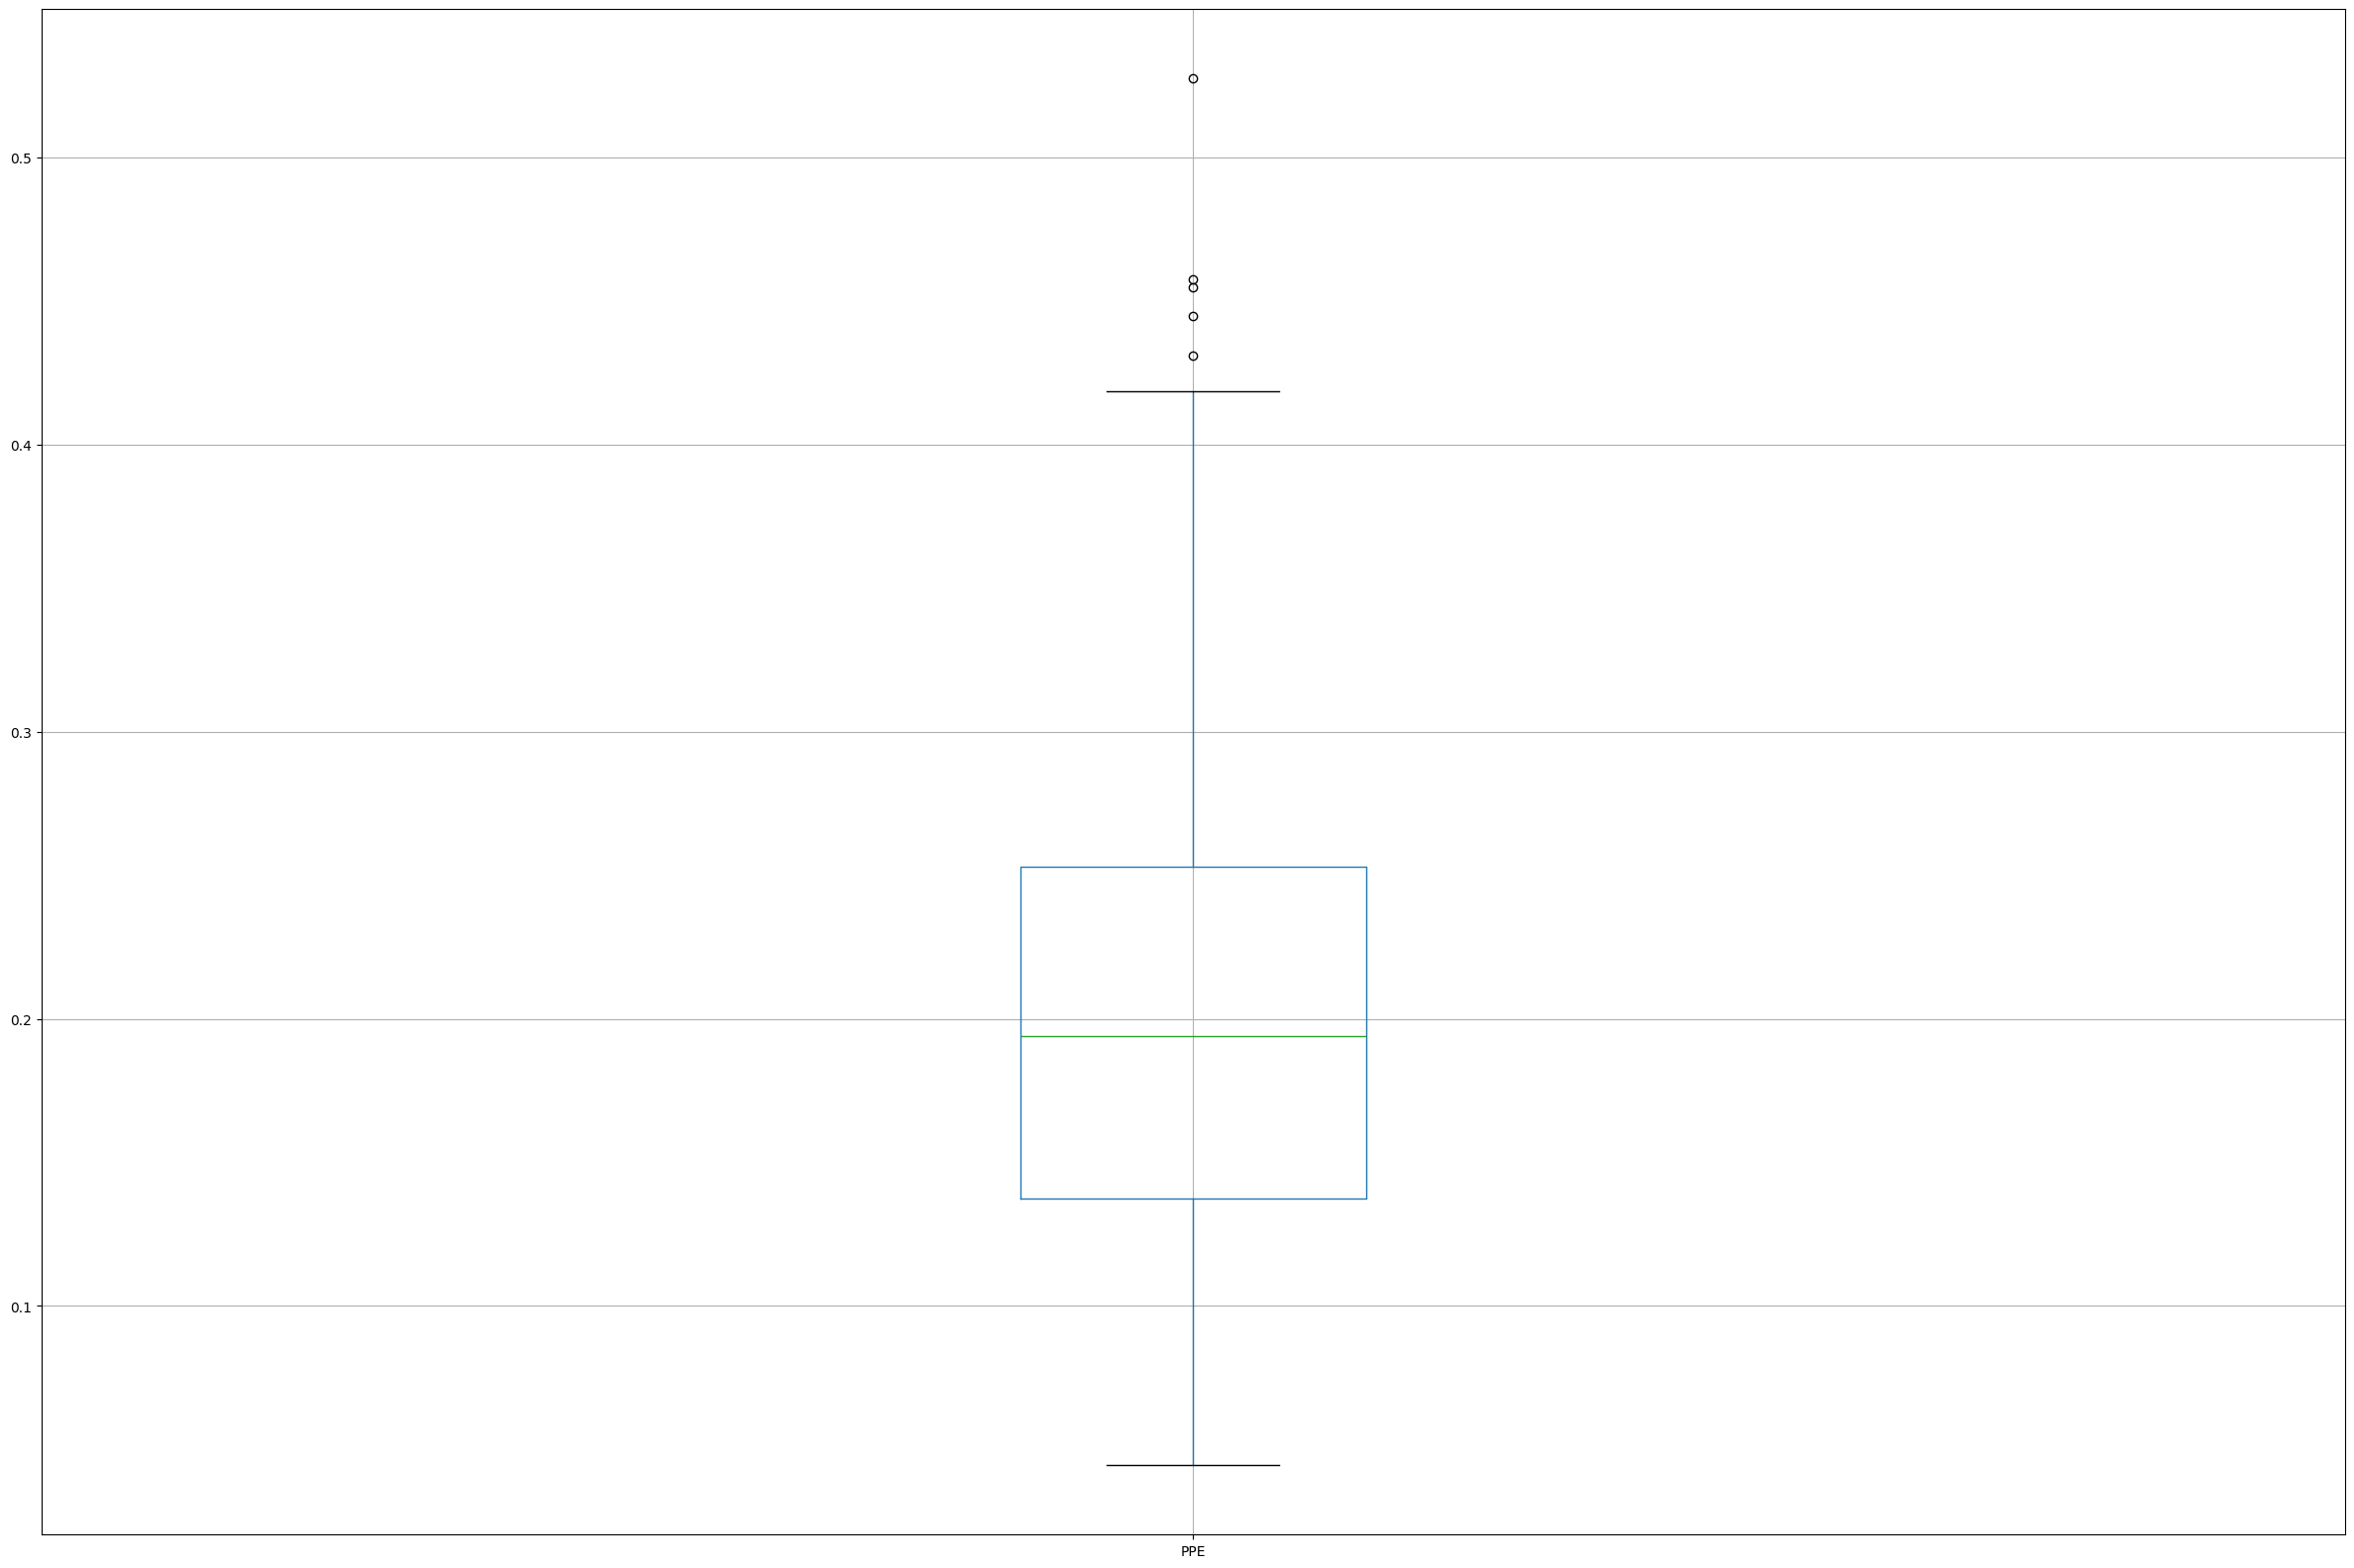

In [12]:
parkDF.boxplot(figsize=(30,20),column='PPE')

In [13]:
parkDF[parkDF['MDVP:Jitter(Abs)']>0.00010]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
98,phon_R01_S24_2,125.791,140.557,96.206,0.01378,0.00011,0.00826,0.00655,0.02478,0.04689,0.422,0.02542,0.02630,0.03908,0.07625,0.10323,15.433,1,0.571010,0.690892,-5.159169,0.202146,2.441612,0.260375
99,phon_R01_S24_3,126.512,141.756,99.770,0.01936,0.00015,0.01159,0.00990,0.03476,0.06734,0.659,0.03611,0.03963,0.05783,0.10833,0.16744,12.435,1,0.638545,0.674953,-3.760348,0.242861,2.634633,0.378483
100,phon_R01_S24_4,125.641,141.068,116.346,0.03316,0.00026,0.02144,0.01522,0.06433,0.09178,0.891,0.05358,0.04791,0.06196,0.16074,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
101,phon_R01_S24_5,128.451,150.449,75.632,0.01551,0.00012,0.00905,0.00909,0.02716,0.06170,0.584,0.03223,0.03672,0.05174,0.09669,0.11843,15.060,1,0.639808,0.643327,-4.202730,0.310163,2.638279,0.356881
102,phon_R01_S24_6,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,0.930,0.05551,0.05005,0.06023,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
151,phon_R01_S35_6,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,1.302,0.05647,0.07940,0.13778,0.16942,0.21713,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367
152,phon_R01_S35_7,198.116,233.099,174.478,0.02714,0.00014,0.01568,0.01699,0.04705,0.08684,1.018,0.04284,0.05556,0.08318,0.12851,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,3.184027,0.454721
157,phon_R01_S37_5,117.963,134.209,100.757,0.01813,0.00015,0.01117,0.00718,0.03351,0.04912,0.438,0.02610,0.02161,0.02916,0.07830,0.10748,19.075,1,0.630547,0.646786,-3.444478,0.303214,2.964568,0.261305


## trying to identify causes for the outliers

In [14]:
parkDF[parkDF['MDVP:Fo(Hz)']>250]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
47,phon_R01_S10_6,252.455,261.487,182.786,0.00185,0.000007,0.00092,0.00113,0.00276,0.01152,0.103,0.00614,0.0073,0.00860,0.01841,0.00432,26.805,0,0.610367,0.635204,-7.319510,0.200873,2.028612,0.086398
167,phon_R01_S42_3,260.105,264.919,237.303,0.00339,0.000010,0.00205,0.00186,0.00616,0.02030,0.197,0.01186,0.0123,0.01367,0.03557,0.00910,21.083,0,0.440988,0.628058,-7.517934,0.160414,1.881767,0.075587


In [15]:
parkDF[parkDF['MDVP:Fhi(Hz)']>550]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
73,phon_R01_S19_2,112.014,588.518,107.024,0.00533,0.00005,0.00268,0.00329,0.00805,0.02448,0.226,0.01373,0.01375,0.01956,0.04120,0.00623,24.178,1,0.509127,0.789532,-5.389129,0.306636,1.928708,0.225461
102,phon_R01_S24_6,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,0.930,0.05551,0.05005,0.06023,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
149,phon_R01_S35_4,202.632,565.740,177.258,0.01627,0.00008,0.00919,0.00963,0.02756,0.07170,0.833,0.03515,0.04265,0.06460,0.10546,0.07889,14.989,1,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173
186,phon_R01_S49_4,116.556,592.030,86.228,0.00496,0.00004,0.00254,0.00263,0.00762,0.01660,0.154,0.00820,0.00972,0.01491,0.02460,0.01397,23.958,0,0.566424,0.667654,-6.431119,0.153310,2.161936,0.120605
187,phon_R01_S49_5,116.342,581.289,94.246,0.00267,0.00002,0.00115,0.00148,0.00345,0.01300,0.117,0.00631,0.00789,0.01144,0.01892,0.00680,25.023,0,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868


In [16]:
parkDF[parkDF['MDVP:Jitter(%)']>0.030]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
100,phon_R01_S24_4,125.641,141.068,116.346,0.03316,0.00026,0.02144,0.01522,0.06433,0.09178,0.891,0.05358,0.04791,0.06196,0.16074,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
102,phon_R01_S24_6,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,0.930,0.05551,0.05005,0.06023,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
151,phon_R01_S35_6,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,1.302,0.05647,0.07940,0.13778,0.16942,0.21713,8.441,1,0.625866,0.768320,-2.434031,0.450493,3.079221,0.527367


In [17]:
parkDF[parkDF['MDVP:Jitter(Abs)']>0.00020]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
100,phon_R01_S24_4,125.641,141.068,116.346,0.03316,0.00026,0.02144,0.01522,0.06433,0.09178,0.891,0.05358,0.04791,0.06196,0.16074,0.31482,8.867,1,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961
102,phon_R01_S24_6,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,0.930,0.05551,0.05005,0.06023,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774


## visualizing the disease rate

In [18]:
parkDF['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

<Axes: xlabel='status'>

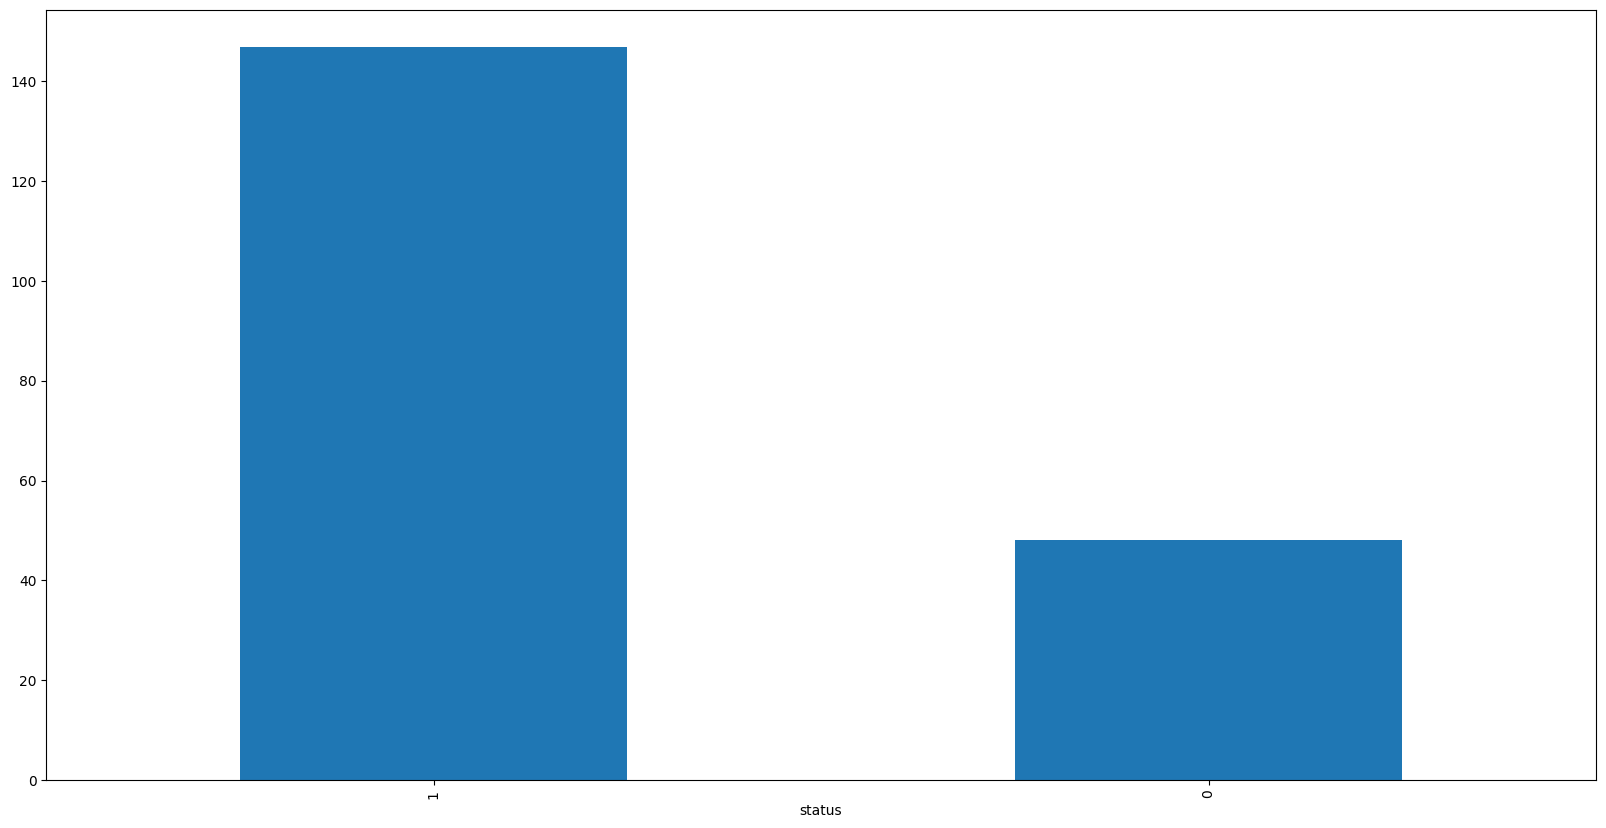

In [19]:
parkDF['status'].value_counts().plot(kind='bar',figsize=(20,10))

# data cleaning

## cleaning the outliers using Winsorized Mean

In [20]:
def percentile_capping(df, cols, from_low_end, from_high_end):
    for col in cols:       
        stats.mstats.winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)

In [21]:
featuresWithProblem = ['MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','spread1','spread2','D2','PPE']
percentile_capping(parkDF, featuresWithProblem, 0.10, 0.10)

array([[<Axes: title={'center': 'MDVP:Fo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Fhi(Hz)'}>,
        <Axes: title={'center': 'MDVP:Flo(Hz)'}>,
        <Axes: title={'center': 'MDVP:Jitter(%)'}>,
        <Axes: title={'center': 'MDVP:Jitter(Abs)'}>],
       [<Axes: title={'center': 'MDVP:RAP'}>,
        <Axes: title={'center': 'MDVP:PPQ'}>,
        <Axes: title={'center': 'Jitter:DDP'}>,
        <Axes: title={'center': 'MDVP:Shimmer'}>,
        <Axes: title={'center': 'MDVP:Shimmer(dB)'}>],
       [<Axes: title={'center': 'Shimmer:APQ3'}>,
        <Axes: title={'center': 'Shimmer:APQ5'}>,
        <Axes: title={'center': 'MDVP:APQ'}>,
        <Axes: title={'center': 'Shimmer:DDA'}>,
        <Axes: title={'center': 'NHR'}>],
       [<Axes: title={'center': 'HNR'}>,
        <Axes: title={'center': 'status'}>,
        <Axes: title={'center': 'RPDE'}>,
        <Axes: title={'center': 'DFA'}>,
        <Axes: title={'center': 'spread1'}>],
       [<Axes: title={'center': 'spread2'}>,
   

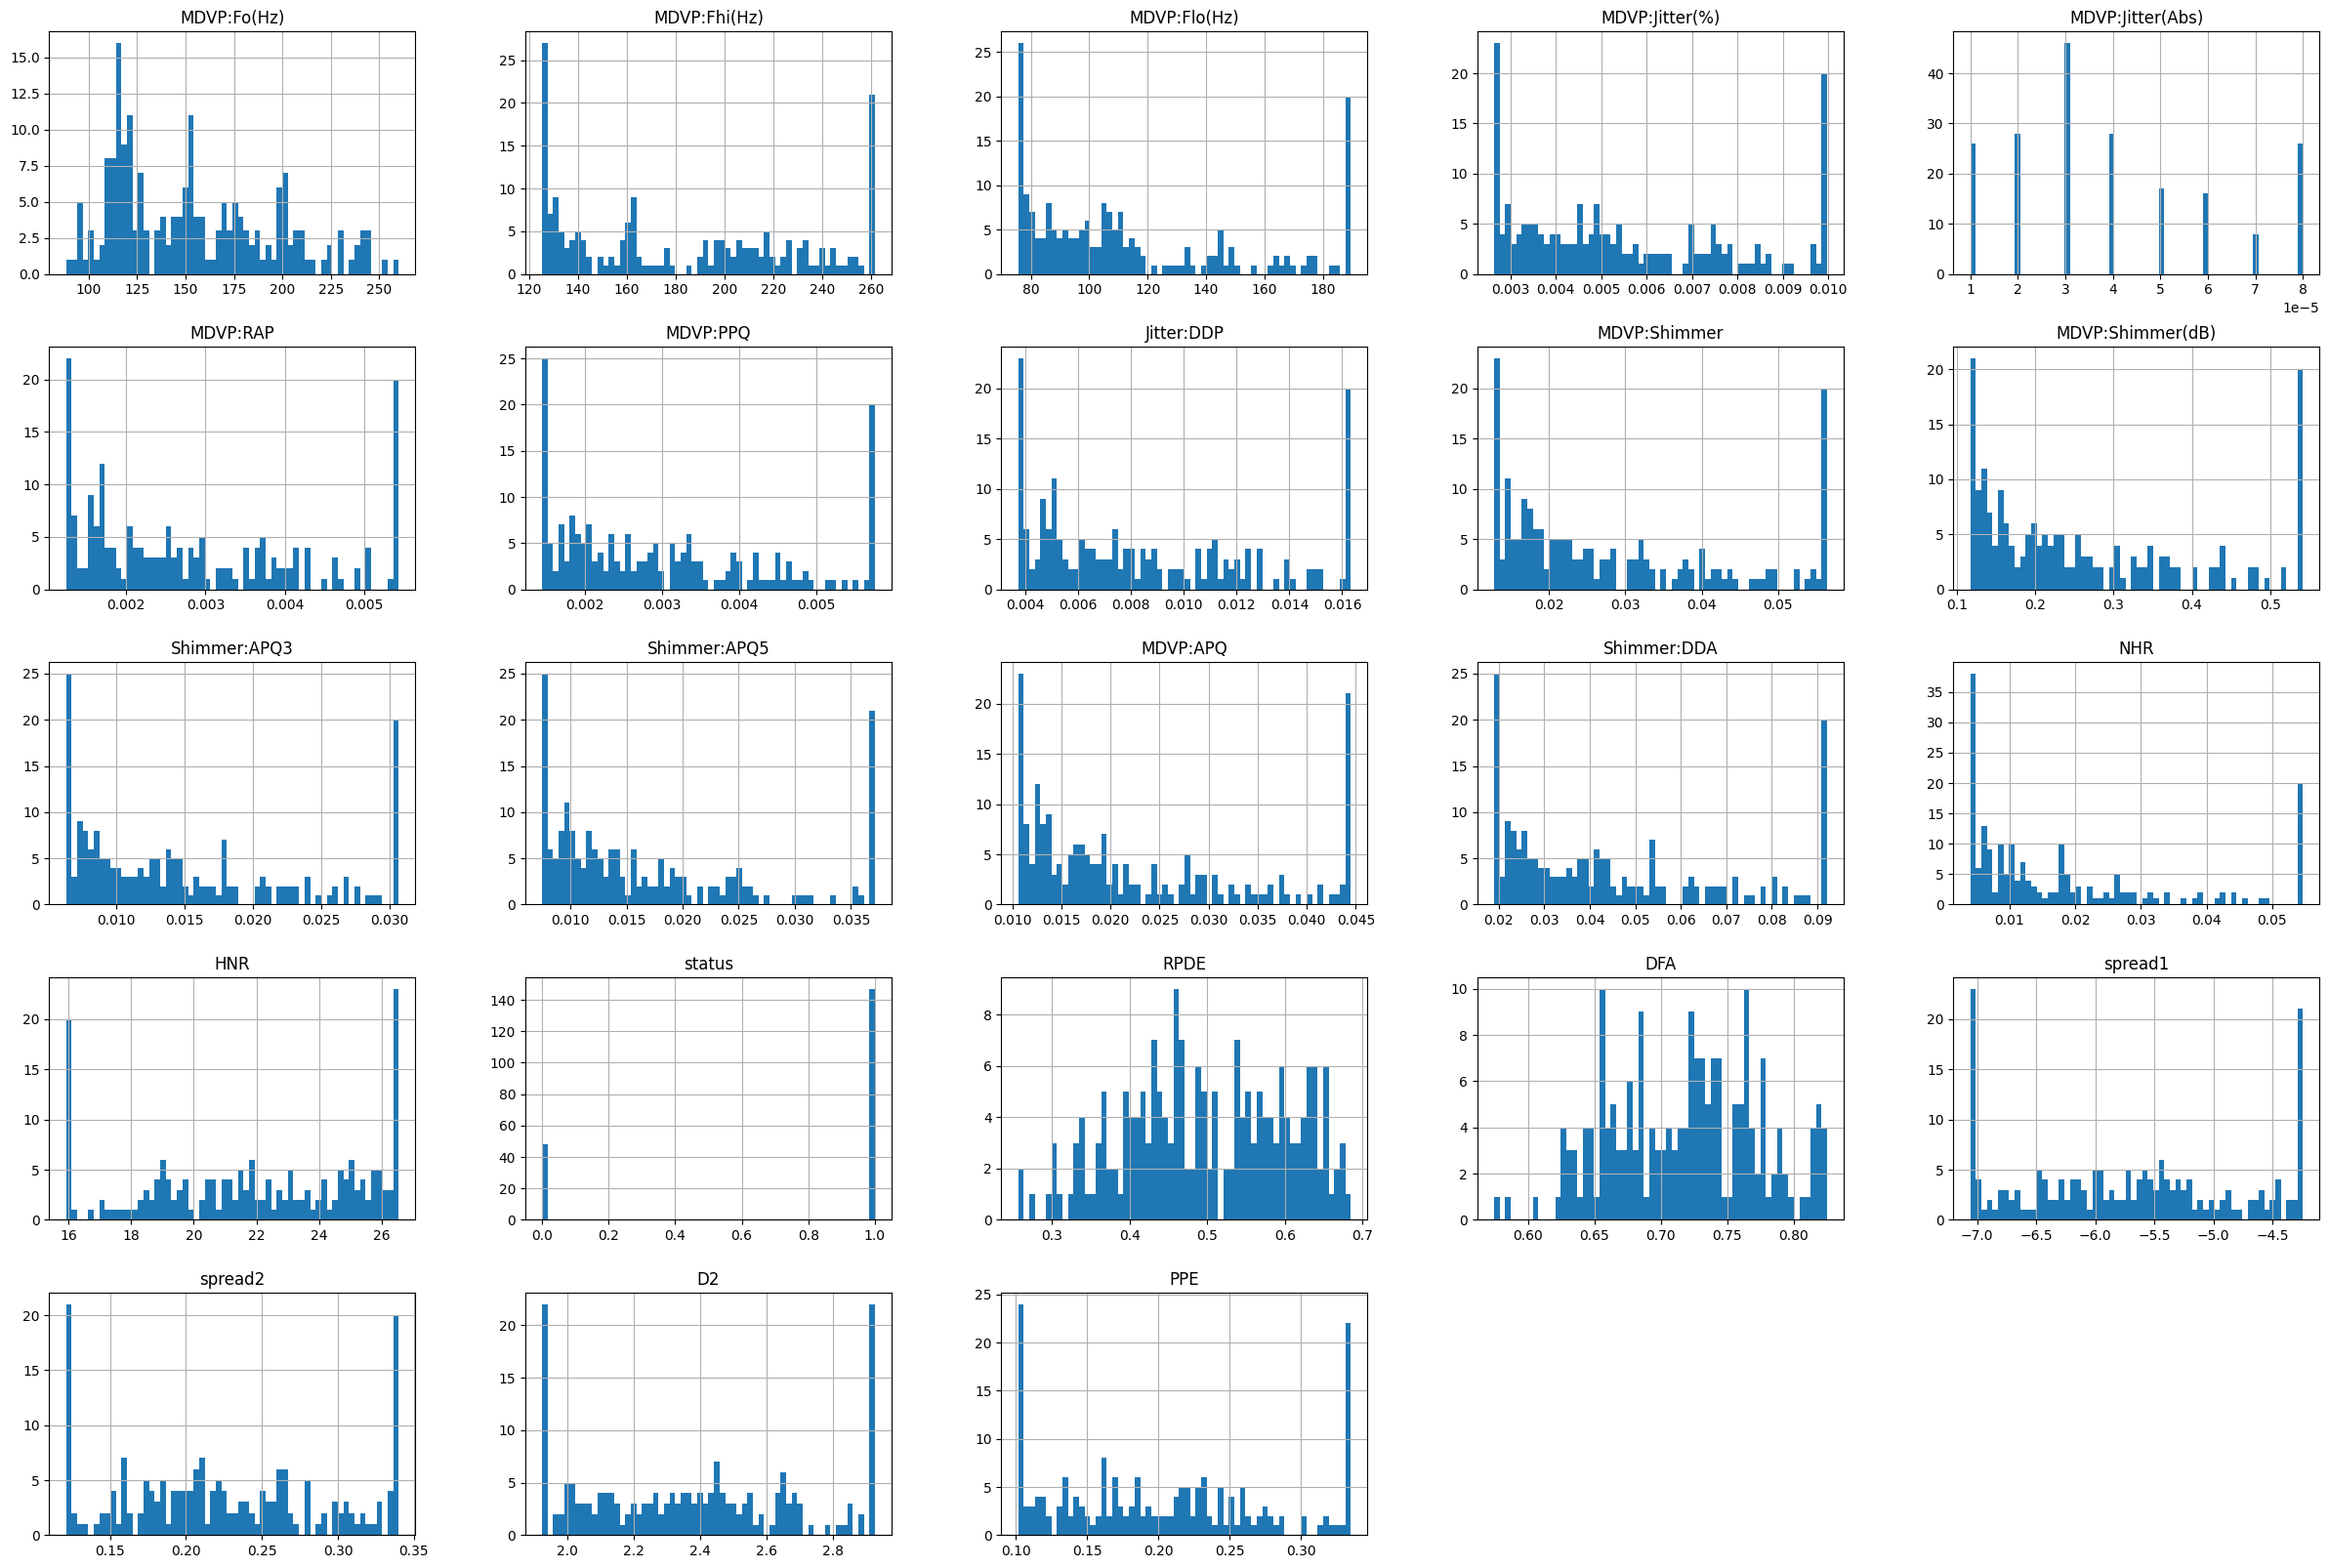

In [22]:
parkDF.hist(figsize=(30,20),bins = 60)

In [23]:
parkDF.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,183.384236,114.354785,0.005485,0.000040,0.002833,0.003032,0.008502,0.028224,0.263754,0.014927,0.017062,0.022448,0.044780,0.018352,21.989662,0.753846,0.498536,0.718099,-5.718905,0.226513,2.375954,0.202569
std,41.390065,47.753467,37.150677,0.002384,0.000022,0.001372,0.001388,0.004115,0.014420,0.138315,0.007924,0.009475,0.011377,0.023774,0.016142,3.438411,0.431878,0.103942,0.055336,0.912583,0.069278,0.320273,0.075130
min,88.333000,125.213000,75.603000,0.002640,0.000010,0.001240,0.001440,0.003730,0.012790,0.117000,0.006330,0.007470,0.010590,0.018980,0.004010,15.924000,0.000000,0.256570,0.574282,-7.057869,0.120956,1.922940,0.101516
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,261.487000,189.621000,0.009970,0.000080,0.005440,0.005760,0.016330,0.056430,0.542000,0.030700,0.037140,0.044510,0.092110,0.054700,26.547000,1.000000,0.685151,0.825288,-4.242867,0.340176,2.925862,0.335041


# machine learning

## data standraization 

In [30]:
x = parkDF.drop(['status','name'], axis = 1)
y = parkDF['status']

In [31]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

## prediction model

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=45)

In [34]:
models = [LogisticRegression, SVC, DecisionTreeClassifier, RandomForestClassifier,KNeighborsClassifier]
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

In [35]:
for model in models:
    classifier = model().fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

## method to compare the models with eachother

In [36]:
compare_df = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "Decision Tree", "Random Forest","KNN"],
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1 Score": f1_scores
})

compare_df.set_index('Model', inplace=True)
compare_df

,Accuracy,Precision,Recall,F1 Score
Model,,,,
Logistic Regression,0.846154,0.848485,0.965517,0.903226
SVM,0.871795,0.852941,1.000000,0.920635
Decision Tree,0.897436,0.903226,0.965517,0.933333
Random Forest,0.897436,0.903226,0.965517,0.933333
KNN,0.871795,0.875000,0.965517,0.918033


### Inference¶
    In the context of parkinson's Disease Prediction,

    All models, including Logistic Regression, SVM, Decision Tree, KNN, and Random Forest, exhibit high accuracy, signifying their ability to correctly classify individuals with or without Parkinson's disease. Precision scores indicate that the models, particularly Random Forest and decision tree, excel at making accurate positive predictions, minimizing false positives. Furthermore, all models achieve almost perfect recall, demonstrating their sensitivity in correctly identifying all actual cases of Parkinson's disease. The Random Forest and decision tree models outperform others with the highest F1 score, indicating a well-balanced trade-off between precision and recall. Overall, these machine learning models show significant potential for early Parkinson's disease detection, with the Random Forest and decision tree models standing out as a robust choice for its superior F1 score and overall strong performance.